<a href="https://colab.research.google.com/github/ssave41/ML/blob/master/J041_remedial_assignment_solar_flare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Created wheel for all-in-one-ml: filename=all_in_one_ml-0.0.3-cp36-none-any.whl size=3868 sha256=770b8c5349cfbe77550e04c954bb38f94504ce6ffa04a1749888f76bde13f06e
  Stored in directory: /root/.cache/pip/wheels/26/4f/f4/d595e3f4e73e8a49c62b9e2e99856618444f8d4c938d9c1b28
Successfully built all-in-one-ml


In [ ]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [ ]:
data = datasets.fetch_openml('solar-flare')

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name solar-flare exist. Versions may be fundamentally different, returning version 3.
  " {version}.".format(name=name, version=res[0]['version']))


In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [ ]:
df.head()

,largest_spot_size,spot_distribution,Activity,Evolution,Previous_24_hour_flare_activity_code,Historically-complex,Did_region_become_historically_complex,Area,Area_of_the_largest_spot,C-class_flares_production_by_this_region,M-class_flares_production_by_this_region,X-class_flares_production_by_this_region,class
0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,4.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
2,4.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,4.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2


In [ ]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
x_hot,y_hot = beginner.one_hot(x,y,cat='~')
print(x_hot,y_hot)

     largest_spot_size_0.0  ...  X-class_flares_production_by_this_region_1.0
0                        0  ...                                             0
1                        0  ...                                             0
2                        0  ...                                             0
3                        0  ...                                             0
4                        1  ...                                             0
..                     ...  ...                                           ...
310                      0  ...                                             0
311                      0  ...                                             0
312                      1  ...                                             0
313                      0  ...                                             0
314                      0  ...                                             0

[315 rows x 34 columns]      0  1  2  3  5
0    0  1  0  0  0
1

In [ ]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x_hot,y_hot,0.2,8)

(252, 34) (252, 5) (63, 34) (63, 5)


In [ ]:
x_train.head()

,largest_spot_size_0.0,largest_spot_size_1.0,largest_spot_size_2.0,largest_spot_size_3.0,largest_spot_size_4.0,largest_spot_size_5.0,spot_distribution_0.0,spot_distribution_1.0,spot_distribution_2.0,spot_distribution_3.0,Activity_0.0,Activity_1.0,Evolution_0.0,Evolution_1.0,Evolution_2.0,Previous_24_hour_flare_activity_code_0.0,Previous_24_hour_flare_activity_code_1.0,Historically-complex_0.0,Historically-complex_1.0,Did_region_become_historically_complex_0.0,Did_region_become_historically_complex_1.0,Area_0.0,Area_1.0,Area_of_the_largest_spot_0.0,Area_of_the_largest_spot_1.0,C-class_flares_production_by_this_region_0.0,C-class_flares_production_by_this_region_1.0,C-class_flares_production_by_this_region_2.0,M-class_flares_production_by_this_region_0.0,M-class_flares_production_by_this_region_1.0,M-class_flares_production_by_this_region_2.0,M-class_flares_production_by_this_region_3.0,X-class_flares_production_by_this_region_0.0,X-class_flares_production_by_this_region_1.0
303,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0
22,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
64,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0
100,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
113,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0


In [ ]:
y_train.head()

,0,1,2,3,5
303,0,0,0,0,1
22,1,0,0,0,0
64,0,1,0,0,0
100,0,0,0,0,1
113,0,0,1,0,0


In [ ]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               3500      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 505       
Total params: 24,205
Trainable params: 24,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7/7 [==============================] - 0s 25ms/step - loss: 1.5558 - accuracy: 0.2587 - val_loss: 1.4496 - val_accuracy: 0.4510
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 1.4021 - accuracy: 0.4826 - val_loss: 1

In [ ]:
beginner.get_accuracy(x_test,y_test,model)

2/2 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7302


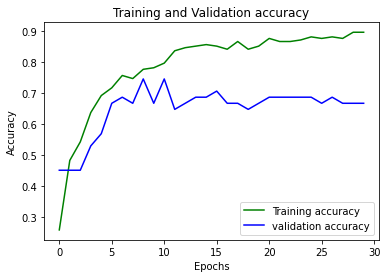

In [ ]:
beginner.accuracy_vs_valaccuracy(model,history,30)

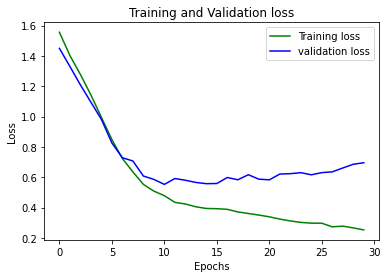

In [ ]:
beginner.loss_vs_valloss(model,history,30)